FOR LOADING DATA :

-- This settings must be on

-- show global variables like 'local_infile';

-- set global local_infile=true;

-- SET GLOBAL local_infile = 1;

-- Then to load file you must connect with :

sudo mysql --local-infile=1 -u root

CREATE DATABASE users_Apple;
DROP TABLE IF EXISTS user_Apple;
CREATE TABLE user_Apple ( `User ID` INT,Gender VARCHAR(8),Age INT,EstimatedSalary INT,Purchased BOOLEAN);

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sqlalchemy import create_engine
import pymysql
import seaborn as sns
import numpy as np
from sklearn import svm

In [22]:
data = pd.read_csv('data.csv', delimiter = ',')

In [23]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [12]:
sqlEngine = create_engine('mysql+pymysql://root:@127.0.0.1/users_Apple')
dbConnection    = sqlEngine.connect()

In [25]:
data.to_sql('user_Apple', con=sqlEngine, if_exists='append',index=False)

In [26]:
sqlEngine.execute("SELECT * FROM user_Apple" ).fetchall()

[(15624510, 'Male', 19, 19000, 0),
 (15810944, 'Male', 35, 20000, 0),
 (15668575, 'Female', 26, 43000, 0),
 (15603246, 'Female', 27, 57000, 0),
 (15804002, 'Male', 19, 76000, 0),
 (15728773, 'Male', 27, 58000, 0),
 (15598044, 'Female', 27, 84000, 0),
 (15694829, 'Female', 32, 150000, 1),
 (15600575, 'Male', 25, 33000, 0),
 (15727311, 'Female', 35, 65000, 0),
 (15570769, 'Female', 26, 80000, 0),
 (15606274, 'Female', 26, 52000, 0),
 (15746139, 'Male', 20, 86000, 0),
 (15704987, 'Male', 32, 18000, 0),
 (15628972, 'Male', 18, 82000, 0),
 (15697686, 'Male', 29, 80000, 0),
 (15733883, 'Male', 47, 25000, 1),
 (15617482, 'Male', 45, 26000, 1),
 (15704583, 'Male', 46, 28000, 1),
 (15621083, 'Female', 48, 29000, 1),
 (15649487, 'Male', 45, 22000, 1),
 (15736760, 'Female', 47, 49000, 1),
 (15714658, 'Male', 48, 41000, 1),
 (15599081, 'Female', 45, 22000, 1),
 (15705113, 'Male', 46, 23000, 1),
 (15631159, 'Male', 47, 20000, 1),
 (15792818, 'Male', 49, 28000, 1),
 (15633531, 'Female', 47, 30000, 1

In [28]:
data_sql = pd.read_sql_table('user_Apple', con=sqlEngine)

In [29]:
data_sql

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [30]:
data_sql['Gender_Bool'] = data_sql['Gender'].replace({'Male':0, 'Female':1})

In [31]:
data_sql

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_Bool
0,15624510,Male,19,19000,0,0
1,15810944,Male,35,20000,0,0
2,15668575,Female,26,43000,0,1
3,15603246,Female,27,57000,0,1
4,15804002,Male,19,76000,0,0
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,1
396,15706071,Male,51,23000,1,0
397,15654296,Female,50,20000,1,1
398,15755018,Male,36,33000,0,0


In [33]:
data_sql.shape


(400, 6)

<BarContainer object of 400 artists>

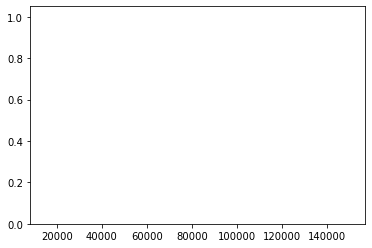

In [38]:
plt.bar(data_sql['EstimatedSalary'],data_sql['Purchased'])

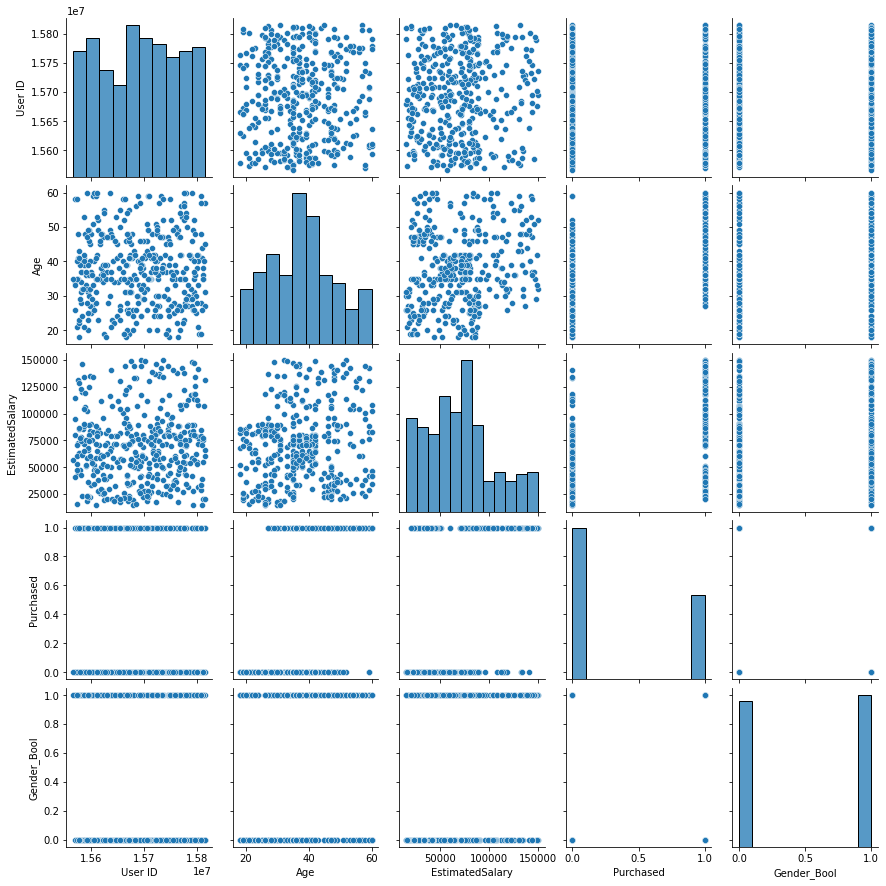

In [39]:
sns.pairplot(data_sql)

In [40]:
sns.heatmap(data_sql)

ValueError: could not convert string to float: 'Male'